<a href="https://www.kaggle.com/code/yahyasoker/titanic-survival-prediction?scriptVersionId=127914730" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### [1.Preparing Data](#1)
### [2.Data Visualization](#2)
### [3.Data Manipulation](#3)
    encoding
    Separating features & Target
    Train test split
### [4.Training Data](#4)
### [5.Model Evaluation](#5)
    Accuracy Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<a id='1'></a>
### 1.Perparing Data

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# looking for null datas
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# getting informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# drop the "Cabin" column from the dataframe
df = df.drop(columns='Cabin', axis=1)

# replacing the missing values in "Age" column with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

# finding the mode value of "Embarked" column
print(df['Embarked'].mode())

0    S
dtype: object


In [6]:
# replacing the missing values in embarked column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [7]:
# finding the number of people survived and not survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<a id='2'></a>
### 2.Data Visualization

In [8]:
sns.set()

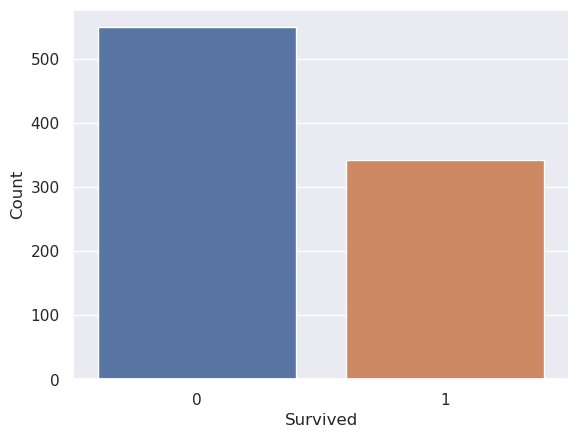

In [9]:
# Create a count plot for the "Survived" column
sns.countplot(x='Survived', data=df)

# Add labels for the x- and y-axes
plt.xlabel('Survived')
plt.ylabel('Count')

# Show the plot
plt.show()

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

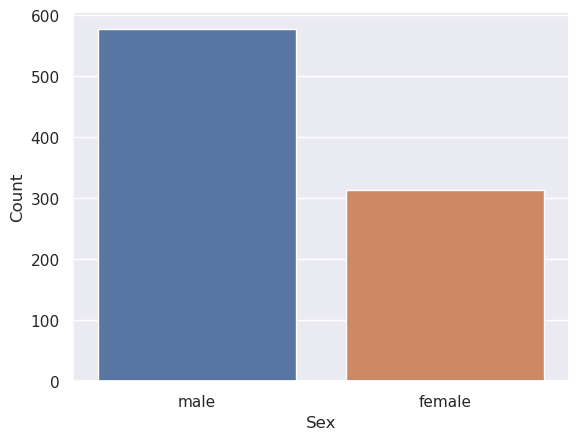

In [11]:
# Create a count plot for the "Survived" column
sns.countplot(x='Sex', data=df)

# Add labels for the x- and y-axes
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

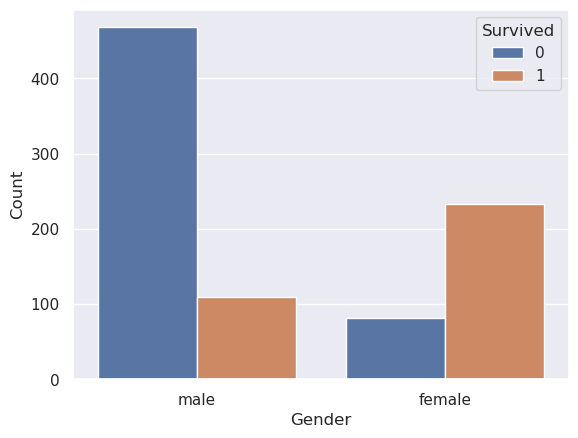

In [12]:
# Create a count plot for the number of survivors gender-wise
sns.countplot(x='Sex', hue='Survived', data=df)

# Add labels for the x- and y-axes
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

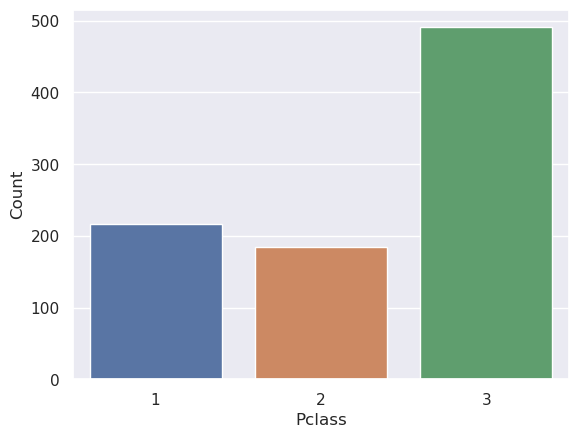

In [13]:
# making a count plot for "Pclass" column
sns.countplot(x = 'Pclass', data=df)

# Add labels for the x- and y-axes
plt.xlabel('Pclass')
plt.ylabel('Count')

# Show the plot
plt.show()

<a id='3'></a>
### 3.Data Manipulation

#### Encoding

In [14]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# converting categorical Columns

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

#### Separating features & Target

In [17]:
x = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = df['Survived']

### Train test split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<a id='4'></a>
### 4.Training Data

In [19]:
model = LogisticRegression()

In [20]:
# training the Logistic Regression model with training data
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

<a id='5'></a>
### 5.Model Evaluation

#### Accuracy Score

In [21]:
train_data_pred = model.predict(x_train)
training_data_acc = accuracy_score(y_train, train_data_pred)
print(f"Accuracy score of training data : %{round(training_data_acc*100)}")

Accuracy score of training data : %80


In [22]:
# accuracy on test data
test_data_pred = model.predict(x_test)
test_data_acc = accuracy_score(test_data_pred,y_test)
print(f"Accuracy score of test data: %{round(test_data_acc*100)}")

Accuracy score of test data: %80
